# Techniques

1. Delete record having missing values
2. Create separate model to handle missing values
3. Statistical methods like mean,median or mode


## Deleting records (rows)

### Condition 
The dataset is huge (millions of rows) then deleting some rows will not effect machine learning


## Creating separate model

### Cons
    * Takes more time
    * High computational effort

### Working
Divide dataset between **Train & Test(missing values) dataset**

**Test Dataset** : Missing rows 


**Train Dataset** : Remaining rows

* Train model from Train dataset
* **Find missing values from trained model**



## Statistical methods (Most preffered)

### Mean (Average)
Find mean of all values **replace missing with mean**


### Median (Middle in sorted) 
* Sort values in ascending order
* Find median **replace missing with median**

### Mode (Frequency)
* Find value(mode) with **highest frequency**
* **Replace missing with mode**

## Logistic Regression on Titanic dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Finding missing data

<AxesSubplot:>

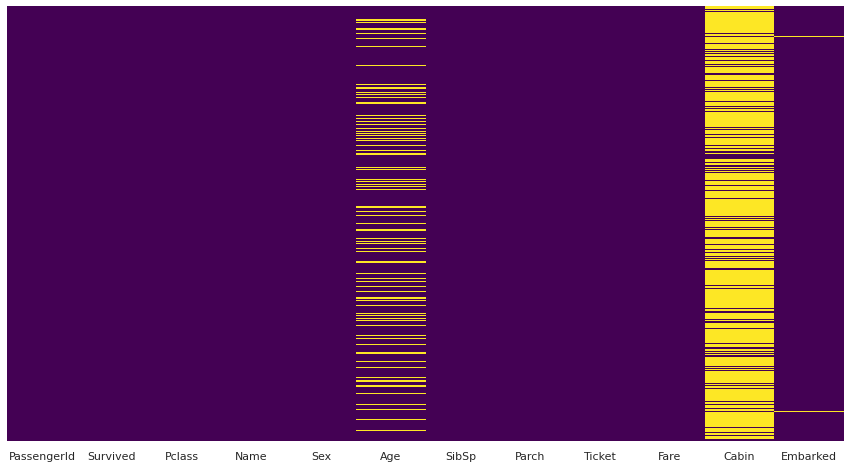

In [112]:
# Creating heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style('whitegrid')
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Yellow lines** : Missing Data

Hence features **Age**, **Cabin** and **Embarked** have missing data values

In [40]:
for feature in train_data.columns:
    missing_count = train_data[feature].isnull().sum()
    if missing_count > 0:
        print(f"{feature} : {missing_count} missing values ({np.round(missing_count*100/train_data.shape[0],3)} %)")

Age : 177 missing values (19.865 %)
Cabin : 687 missing values (77.104 %)
Embarked : 2 missing values (0.224 %)


### Searching for replacement of missing values

[Text(0, 0, '549'), Text(0, 0, '342')]

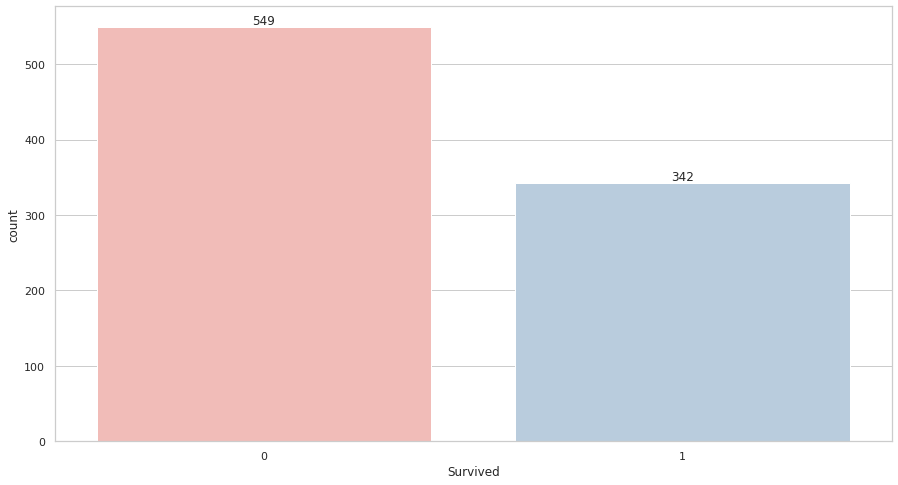

In [139]:
# Countplot of how many people survived
ax = sns.countplot(x = train_data.Survived,palette='Pastel1')
ax.bar_label(ax.containers[0])

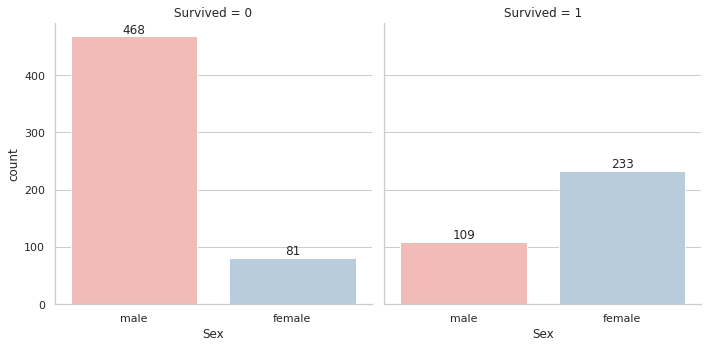

In [207]:
# Count of people who survived vs sex of people
fc = sns.catplot(x='Sex',col = 'Survived',data=train_data,kind='count',palette='Pastel1')

# s_plot = fc.facet_axis(0,0)
# s_plot.bar_label(s_plot.containers[0])

# ns_plot = fc.facet_axis(0,1)
# ns_plot.bar_label(ns_plot.containers[0])

for i in range(2):
    ax = fc.facet_axis(0,i)
    ax.bar_label(ax.containers[0])

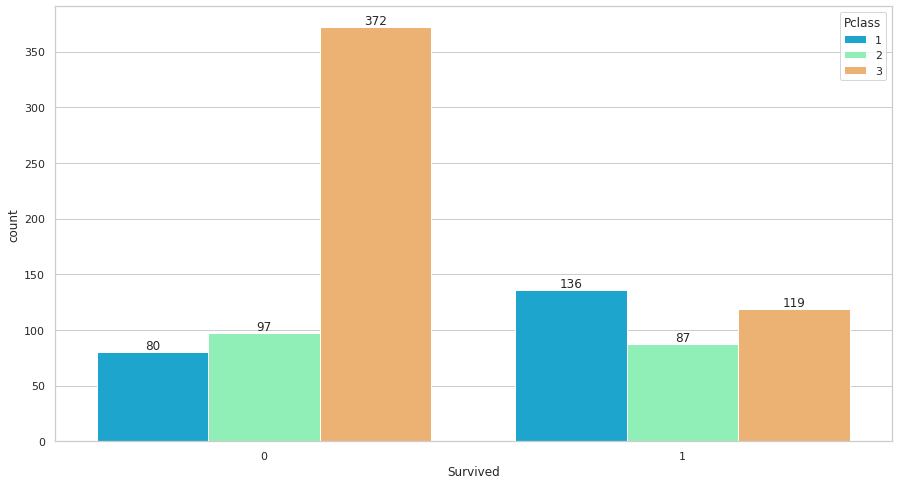

In [238]:
# With respect to class of passengers
ax = sns.countplot(x='Survived',hue='Pclass',data=train_data,palette='rainbow')
for i in range(3):
    ax.bar_label(ax.containers[i])

                            OR

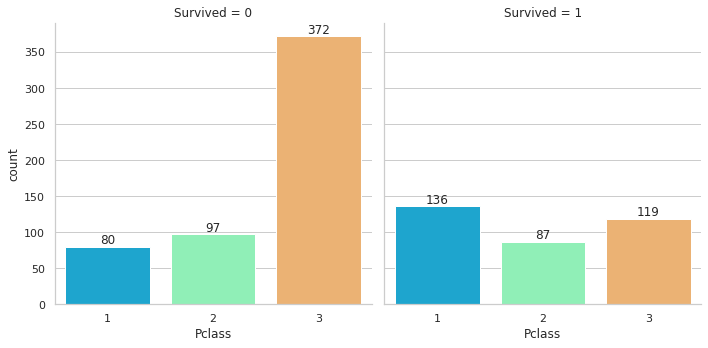

In [237]:
fc = sns.catplot(x = 'Pclass',col='Survived',data=train_data,kind='count',palette='rainbow')

for i in range(2):
    ax = fc.facet_axis(0,i)
    ax.bar_label(ax.containers[0])

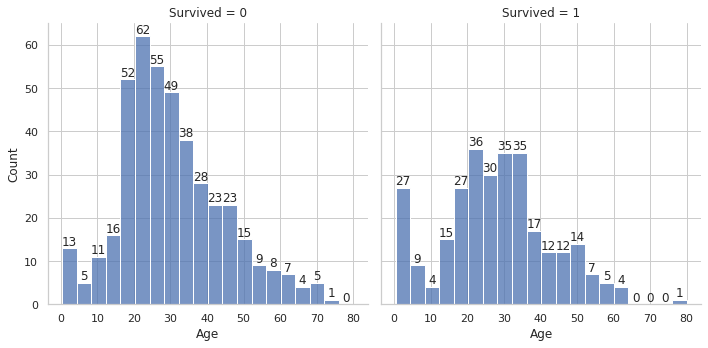

In [223]:
# Age distribution with respect to survival
# dropna() -> Ignore null values
fc = sns.displot(x=train_data.Age.dropna(),col=train_data.Survived)

for i in range(2):
    ax = fc.facet_axis(0,i)
    ax.bar_label(ax.containers[0])

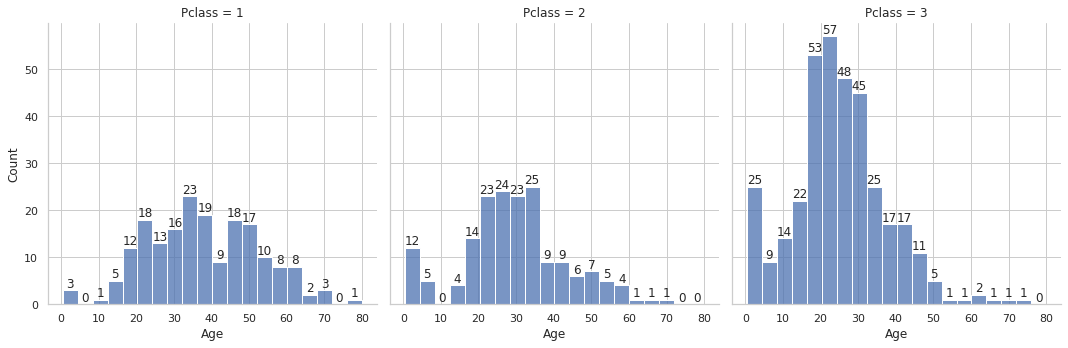

In [224]:
# Age distribution wrt pclass
# dropna() -> Ignore null values
fc = sns.displot(x=train_data.Age.dropna(),col=train_data.Pclass)

for i in range(3):
    ax = fc.facet_axis(0,i)
    ax.bar_label(ax.containers[0])

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

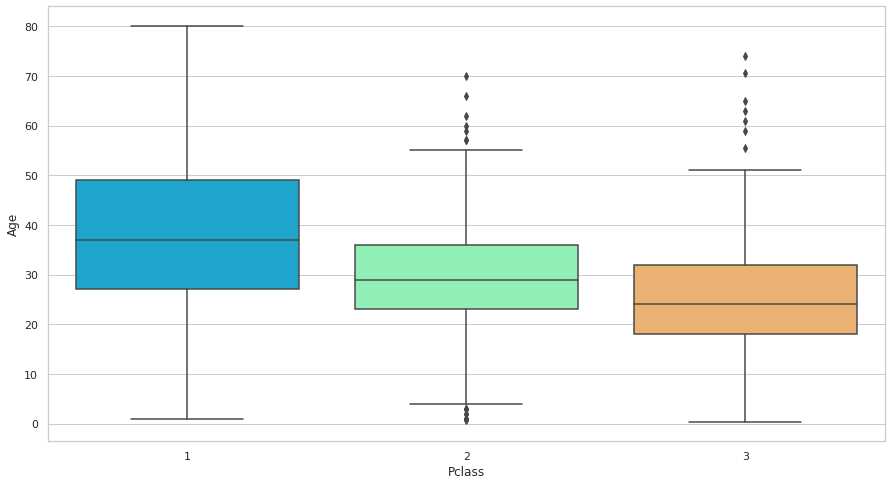

In [240]:
# Box plot of Age wrt pclass
sns.boxplot(x=train_data.Pclass,y=train_data.Age.dropna(),palette='rainbow')
# Median of each class
train_data.groupby('Pclass')['Age'].median()

Here we can see that **median value of age** is much different for each pclass

## Result
We can replace missing age values with median of corresponding passenger class

In [243]:
def setAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train_data['Age'] = train_data[['Age','Pclass']].apply(setAge,axis = 1)

<AxesSubplot:>

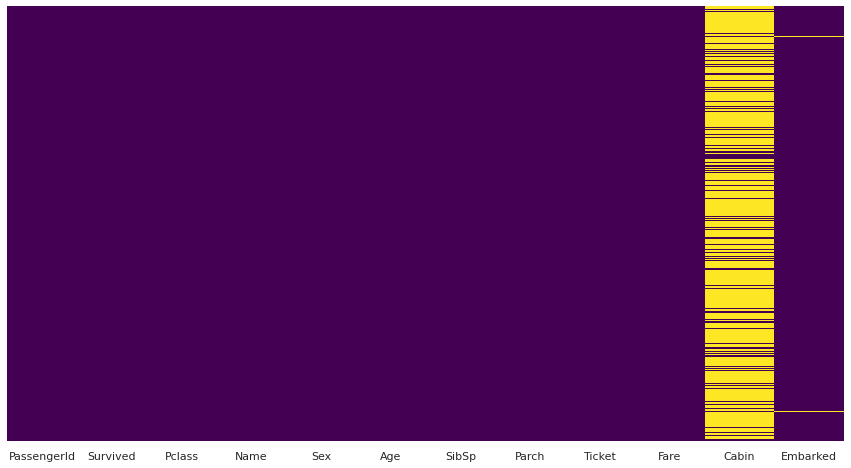

In [244]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [250]:
train_data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [245]:
# Creating new csv file
train_data.to_csv('new_age.csv',index=False)